<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>

<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">تمرین عملی 1: طبقه بندی با شبکه های تمام متصل روی مجموعه داده IRIS</div></center></h1>

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود کتابخانه های مورد نیاز </div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
کتابخانه های مورد نیاز این تمرین لود شده اند
<br>
در صورت نیاز میتوانید کتابخانه های بیشتری لود کنید:
</div>

In [4]:
import numpy as np
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

<div style="direction:rtl;text-align:right;font-family:Tahoma">
در این تمرین میخواهیم از مجموعه داده iris استفاده کنیم.
<br>
توضیحات این مجموعه داده در سایت آن موجود است:
</div>

https://archive.ics.uci.edu/ml/datasets/iris


<div style="direction:rtl;text-align:right;font-family:Tahoma">
ویژگی ها و کلاس های این مجموعه داده به شرح زیر است:
</div>

Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

class:

    Iris Setosa
    Iris Versicolour
    Iris Virginica

<div style="direction:rtl;text-align:right;font-family:Tahoma">
این دیتاست در کتابخانه sklearn موجود است
<br>
در قطعه کد زیر ویژگی ها را در x و برچسب یا labelهای متناظر را در y لود شده است.
</div>

In [5]:
iris_data = load_iris() # load the iris dataset
x = iris_data.data
y = iris_data.target.reshape(-1, 1) # Convert data to a single column

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 1:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
برچسب یا label های ما در حال حاضر عددی است.
<br>
این اعداد 0 تا 2 هستند و به عبارتی 3 حالت مختلف دارند.
<br>
این برچسب ها را به فرمت one-hot تبدیل کنید و خروجی را مجدد در y بریزید.

<br>
<b>راهنمایی: </b>
از تابع keras.utils.to_categorical استفاده کنید.
</div>

In [6]:
#from sklearn.preprocessing import OneHotEncoder


In [8]:
#encoder=OneHotEncoder()
#y_onehot = encoder.fit_transform(y)

In [9]:
y_label = keras.utils.to_categorical(y, num_classes=3)

In [11]:
y_label.shape

(150, 3)

<div style="direction:rtl;text-align:right;font-family:Tahoma">
در زیر داده ها  به داده های test و train تقسیم شده است:
</div>

In [12]:
# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y_label, test_size=0.20)

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 2:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
یک شبکه با دو hidden-layer در هر لایه 10 نوران و تابع فعالیت relu بسازید. یک لایه Dropout با نرخ 0.5 در لایه آخر ماقبل softmax نیز اضافه کنید.
</div>

In [13]:
# Build the model
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=4))

model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

C:\Users\Public\ANACONDA\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

<div style="direction:rtl;text-align:right;font-family:Tahoma">در زیر مدل کامپایل شده است.</div>

In [15]:
# Adam optimizer with learning rate of 0.001
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
h = model.fit(train_x, train_y,
          epochs=200,
          batch_size=5)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7917 - loss: 0.4001 
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8000 - loss: 0.3448 
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8167 - loss: 0.3401 
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7583 - loss: 0.3905 
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8417 - loss: 0.3252 
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8083 - loss: 0.4159 
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9000 - loss: 0.3243 
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7250 - loss: 0.4316  
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7750 - loss: 0.3571 
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8417 - loss: 0.3323  
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8583 - loss: 0.3491 
Epoch 12/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/ste

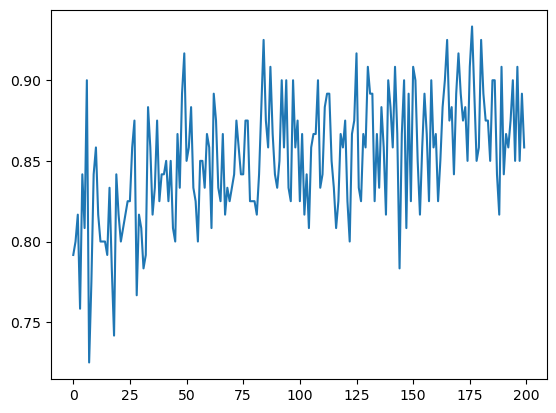

In [23]:
import matplotlib.pyplot as plt
plt.plot(h.history["accuracy"])

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 4:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
مدل را روی داده های test ارزیابی کنید.
<br>
<b>راهنمایی: </b>
از تابع model.evaluate استفاده کنید.
</div>

In [24]:
# Test on unseen data
results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.9333 - loss: 0.1592
Final test set loss: 0.159166
Final test set accuracy: 0.933333
